# Jeu de Nim

Dans cette partie nous coderons un jeu très simple, le «jeu des allumettes». Ce jeu commence avec un tas de 15 allumettes (bien que cela puisse être un autre nombre). Les joueurs suppriment tour à tour de 1 à 3 allumettes du tas. Un joueur gagne s'il force l'autre à prendre la dernière allumette. Notre implémentation opposera un joueur à l'ordinateur.

Pour implémenter le jeu, nous aurons besoin d'apprendre à réaliser des itérations - boucles \[ *looping* \] - et des sélections \[ *branching* \] en assembleur. 

Nous aurons aussi besoin d'apprendre à écrire du texte dans la console et à lire la saisie d'un utilisateur pendant le jeu. Dans le but de comprendre ce dernier point, nous aurons besoin en tout premier lieu de comprendre le chargement (lecture - \[ *to load* \]) et la sauvegarde (écriture - \[ *to store* \]) de valeurs *depuis ou vers* la mémoire en utilisant les instructions `LDR` - \[ *LoaD Register (from memory)* \], et `STR` - \[ *STore Register (to memory)* \].

## Utiliser les adresses mémoire

#### Exercice 15

Remettre le mode de format par défaut **Hex** et vérifier que **Program** et **Memory** soit vide. (C'est le rôle du bouton **Clear** en bas à droite du simulateur)

Saisir et Valider le code suivant:

    MOV R0,#255
    STR R0,68
    HALT
    LDR R1,72
    HALT
    
Vous observez que le code du programme a été traduit en code machine lequel a été chargé dans les cinq premier mots de la mémoire principale.

Faites tourner le programme et observer que, lorsqu'il atteint le premier `HALT`, la valeur d'un des autres mots de la mémoire principale a changé. Copier une copie d'écran de la mémoire qui met en valeur ce qui a changé dans la mémoire.

Expliquer pourquoi la valeur montrée est ce qu'elle est (*what*), et est où elle est (*where*).

À présent, cliquer sur la position mémoire immédiatement à droite de celle qui a été modifiée, et y saisir une valeur. Relancer l'exécution (en appuyant sur Play) et montrer, avec une copie d'écran partielle, que la valeur saisie précédemment a été copiée ('loaded') dans `R1`.

Pourquoi la deuxième opérande pour l'instruction `LDR` est 72 et pas 69? Que se passe-t-il si vous mettez 69 et que vous relancer l'exécution?

________

Un point très important à noter avec le jeu d'instruction de l'ARMlite:
- L'instruction `MOV` ne peut pas travailler avec des adresses mémoires - le deuxième opérande est soit un registre soit une valeur immédiate (de même pour `MVN`),
- L'instruction `LDR` ne peut pas être utilisée pour charger une valeur immédiate dans un registre - le deuxième opérande doit spécifier une adresse mémoire.

Pour la petite histoire, dans certain processeurs, `MOV` (ou son équivalent) peut gérer des registres, des valeurs immédiates et même des adresses mémoire. Un avantage du renforcement de la séparation des rôles, comme sur l'ARMlite, est d'aider le programmeur à se souvenir que les opérations qui impliquent la mémoire principale sont lentes (10x plus environ) par rapport à celles qui n'impliquent que des registres ou des valeurs immédiates.

### Point culture - RISC versus CISC

Dans les premiers temps de l'informatique, les processeurs étaient munis d'un large jeu d'instructions de manière à faciliter la tâche du programmeur dans l'expression des algorithmes et ainsi d'améliorer sa productivité.

Cependant, dans les années 1980, on fit le constat que, puisque la plupart des programmes étaient écrits dans des langages de haut niveau (par opposition aux langages d'assemblages) et qu'ils étaient traduit en code machine automatiquement, le besoin de faire des machines ayant un langage d'assemblage simple à lire ou à écrire pour le programmeur étaient de moins en moins pressant. En réduisant le jeu d'instructions, il est possible de rendre les processeurs plus performants. Cette évolution dans l'architecture des processeurs est connue comme la transition des architectures **CISC** (pour ***Complex*** *Instruction Set Computers*) vers les architectures **RISC** (pour ***Reduced*** *Instruction Set Computers*). La plupart des processeurs modernes ont une architecture RISC bien qu'il n'y ait pas de définition précise de la distinction entre ses deux sortes d'architectures.

Du temps où les architectures CISC étaient prédominantes, on trouvait de nombreuses instructions pour gérer directement la mémoire. Avec le modèle RISC, la plupart des instructions sont de type *registre-vers-registre* (plus rapides) alors que quelques unes seulement sont spécialisées dans le chargement des valeurs depuis ou vers la mémoire principale (plus lentes).
___

## Les étiquettes \[ *Labels* \]

Lorsqu'on écrit un programme en assembleur, il est déjà bien difficile de suivre la signification des valeurs courantes présentes dans les registres généraux alors si on ajoute à cela la gestion des adresses mémoires en «dur»... C'était pourtant nécessaire avec les premiers assembleurs - tout ce qu'il faisait, c'était traduire les codes «mnémoniques» des instructions, comme `MOV R0,#32` dans l'instruction machine correspondante en binaire; du genre: `0b11100011101000000000000000100000`.

L'étape suivante a été l'introduction d'**assembleur symbolique** qui permettait au programmeur de définir des «symboles» (aujourd'hui on parle plutôt d'**étiquettes**) pour *désigner des adresses spécifiques en mémoire*. Aujourd'hui, tous les assembleurs modernes ont cette capacité.

Le court programme qui suit défini deux étiquettes pour des adresses mémoires, `xCoord` et `yCoord`, et initialise les mots situés à ces adresses avec les valeurs 3 et 4 respectivement. Ces définitions d'étiquettes sont situées *après* toutes les instructions du programme - c'est la pratique recommandée. Une définition d'étiquette doit être suivie immédiatement par `:` \[ deux points - *colon* \] comme vous pouvez le voir ci-dessous. Les instructions du programme utilisent ou référencent ces étiquettes, mais une référence à une étiquette ne contient pas le caractère `:`.

      LDR R0, xCoord
      ADD R0, R0, #6
      STR R0, xCoord
      LDR R0, yCoord
      ADD R0, R0, #2
      STR R0, yCoord
      HALT
    xCoord: 3
    yCoord: 4

La plupart du temps, le programmeur ne sait pas (et ne se soucie pas de savoir) où sont situées les valeurs de `xCoord` et `yCoord` en mémoire - simplement parce qu'il peut toujours faire référence à ces positions avec les étiquettes.

#### Exercice 16

Avec le simulateur ARMLite en mode par défaut (**Hex**), saisir et valider le code précédent.

*Avant de le lancer*, passer la souris sur les définitions des étiquettes (dans les deux dernières lignes) dans le code. La tooltip vous montrera les adresses mémoires (en hexa) auquelles ces étiquettes font référence. Quelles sont les adresses respectives de `xCoord` et `yCoord`?

Coller deux copie d'écran partielles de la zone mémoire, l'une prise avant d'avoir fait tourner le programme, l'autre après, en mettant en évidence dans les deux cas les deux mots mémoire pour `xCoord` et `yCoord`.
____

Cet exemple fait apparaître la raison pour laquelle nous avons besoin de l'instruction `HALT`. Si on supprimait cette instruction, l'ARMLite essaierai d'exécuter le prochain mot (lequel contient la valeur de `xCoord`) comme une instruction. Pour la valeur utilisée dans cet exemple, cela échouerai en produisant une erreur «bad instruction». Mais sur un processeur ARM réel, la valeur du mot pourrait très bien correspondre à une instruction réelle et cela produirait un comportement très probablement indésirable et imprévisible.

## Entrée/sortie basique

Une partie le l'ARMLite porte la mention *Input/Output*. Le champ le plus haut de cette zone est la «console» - qu'on peut utiliser pour envoyer du texte à l'utilisateur; le champ situé juste en dessous sert à permettre à l'utilisateur de saisir des données lorsque le programme en demande.

L'ARMlite utilise les instruction `STR` et `LDR` en combinaison avec des étiquettes prédéfinies pour gérer l'interaction avec ces champs. Cette manière de faire est connue sous le nom **d'entrées/sorties mappés en mémoire** \[ *memory mapped I/O* \].

Nous introduirons ces idées en réalisant un premier pas vers le jeu de Nim. Nous utiliserons une approche incrémentale \[ *iterative* \] de développement: écrire un petit bout correspondant à l'une des fonctionnalité du jeu à chaque étape. Voici la première itération:

```
//R0 - allumettes restantes
//R1 - pour écrire des messages
//R2 - nombre d'allumettes à enlever
  MOV R0, #15
  STR R0, .WriteUnsignedNum
  MOV R1, #msg1
  STR R1, .WriteString
  MOV R1, #msg2
  STR R1, .WriteString
  LDR R2, .InputNum
  SUB R0, R0, R2
  HALT
msg1: .ASCIZ "restantes\n"
msg2: .ASCIZ "Combien souhaitez-vous en enlever (1-3)?\n"
```

Quelques explications:
- Les trois premières lignes qui débuttent par `//` sont des **commentaires** sur le rôle des registres utilisés dans le code,

- `msg1` et `msg2` sont des étiquettes mémoires comme nous en avons déjà vues. La différence est que `.ASCIZ` est une *directive* à l'assembleur qui lui demande de positionner chaque caractère de la chaîne en mémoire sur un octet et de terminer avec un octet nul (ASCIZ -> ASCII terminé par un Zéro). L'octet nul permet à l'ARMlite de détecter la fin de la chaîne.

- L'instruction `MOV R1, #msg1` ne charge pas le contenu de msg1 dans R1: cela ne tiendrait pas car la chaîne fait plus de 32bits et de toute façon, il faudrait utiliser `LDR` pour obtenir un tel effet. Au lieu de cela, cette instruction copie la valeur immédiate de l'étiquette msg1 dans R1, c'est-à-dire, l'*adresse en mémoire où se situe le début de cette chaîne*.

- `.WriteSignedNum` est semblable à une étiquette, mais le point du début indique que c'est une étiquette prédéfinie et reconnue par l'ARMLite - plutôt qu'une étiquette définie par l'utilisateur comme msg1. L'assembleur traduit cette étiquette en une adresse mémoire effective bien qu'elle n'apparaisse pas dans la vue de la mémoire principale du simulateur. Durant l'exécution, le fait d'écrire une donnée à l'adresse qui correspond à `.WriteSignedNum` est gérer par l'ARMlite par une écriture dans la console après traduction dans le format valeur décimale signée.

- `.WriteString` est une autre étiquette prédéfinine par l'ARMlite qui permet d'écrire une chaîne complète plutôt qu'un caractère unique. Comme R1 ne peut contenir la chaîne, il contient l'adresse de son premier caractère (La fin est reconnue grâce à l'octet nul placé après le dernier caractère).
  Chaque utilisation de `.WriteString` est donc précédé par une instruction qui précise l'adresse où la chaîne débute comme `MOV R1, #msg1`.

- `LDR R2, .InputNum` est un autre exemple d'entrée/sortie mappés en mémoire. À l'exécution, cette instruction aura pour effet de demander un nombre à l'utilisateur dans le champ prévu à cet effet lequel sera transféré dans le registre `R2` comme si il avait été chargé depuis la mémoire à l'adresse désignée par l'étiquette `.InputNum`.

- Enfin l'écriture `\n` est ce qu'on appelle un caractère d'échappement \[ *escape character* \]. Lorsqu'il est envoyé à la console, elle l'interprète comme une nouvelle ligne.

#### Exercice 17

Faites tourner ce programme. Lorsque le processeur se bloque en attente d'une donnée, saisir 1, 2 ou 3. Lorsque le programme se supend, prendre une capture d'écran partielle montrant la console et montrant la valeur dans `R0` qui devrait être le nombre d'allumettes restantes.
___

## Sélection ou Branchement \[*Branching*\]

Pour le moment nous immaginerons qu'il n'y a qu'un joueur (peu intéressant comme jeu!). Nous voudrions que le programme «recommence» en affichant à chaque fois le nombre d'allumettes restantes. Pour l'ARMlite, la manière la plus simple pour implémenter un branchement est d'utiliser l'instruction `B` (pour *Branch*) laquelle est suivie par les informations qui précisent où ce branchement doit avoir lieu. La façon la plus claire pour préciser où le branchement doit avoir lieu est d'utiliser une étiquette définie par nos soin comme `loop:` que vous voyez plus bas:

```
//R0 - allumettes restantes
//R1 - pour écrire des messages
//R2 - nombre d'allumettes à enlever
  MOV R0, #15
loop: STR R0, .WriteUnsignedNum
  MOV R1, #msg1
  STR R1, .WriteString
  MOV R1, #msg2
  STR R1, .WriteString
  LDR R2, .InputNum
  SUB R0, R0, R2
  B loop
  HALT
msg1: .ASCIZ "restantes\n"
msg2: .ASCIZ "Combien souhaitez-vous en enlever (1-3)?\n"
```

Noter qu'en précisant le point de branchement avec une étiquette, nous n'avons pas besoin de nous soucier du changement d'adresse qui se produit lorsque nous ajoutons ou supprimons des instructions.

#### Exercice 18

Effectuer le changement indiqué ci-avant et faites tourner le programme pour vérifier par vous-même ce qu'il fait à présent.

Pourquoi l'étiquette `loop:` n'a-t-elle pas été placée sur la première instruction (plutôt que la seconde)? Si vous n'êtes pas sûr, expérimenter ce changement.

Même en version mono-utilisateur de ce jeu, il y a deux sérieuses limitations dans ce code. Pourriez-vous les préciser?
_____

Les limitations mentionnées plus tôt nécessitent de pouvoir effectuer une sorte de *sélection* - connue en assembleur sous le vocable «branchement conditionnel» \[ *conditional branching* \]. Un branchement conditionnel fonctionne de manière similaire à `B`, mais le branchement effectif n'est effectué que lorsque certaines conditions sont remplies. Il y a quatre versions de branchement conditionnel pour l'ARMlite:

1. `BEQ` - Branchement en cas d'égalité - *Branch if EQual*,
2. `BNE` - Branchement en cas de différence - *Branch if Not Equal*,
3. `BLT` - Branchement en cas d'infériorité stricte - *Branch if Less Than*,
4. `BGT` - Branchement en cas de supériorité stricte - *Branch if Greater Than*.

La question que vous avez peut-être à l'esprit est probablement: Branchement si *quoi* est égal à *quoi*? Ces branchements conditionnels sont conçus pour être précédés immédiatement par l'instruction `CMP` - *CoMPare* - qui compare deux valeurs, par exemple:

`CMP R0, R1` compare les valeurs des deux registres,

`CMP R3, #16` compare la valeur du registre R3 avec la valeur immédiate 16.



`CMP` fonctionne de manière similaire à `SUB` - elle soustrait son second opérande au premier - mais elle n'assigne pas le résultat à un registre destination, le résultat est simplement ignoré. La seule trace du résultat se trouve dans un registre spécial - désigné par *Status bits* par l'ARMLite - et généralement désigné par PSW pour \[ *Program Status Word* \] (registre d'état en français).

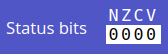

Le bit `N` indique si le résultat de la comparaison était Négatif (bit à 1) ou non, et le bit `Z` s'il était Nul (bit à 1) ou non.

(Les bits `C` pour *Carry* (retenue) et `V` pour *oVerflow* sont utilisés pour détecter une erreur dans le résultat d'une opération - dans le cas où celui-ci ne peut pas tenir dans un registre 32bits. Nous n'en aurons pas besoin pour l'instant.)

Nous modifions le code ci-dessous en introduisant une nouvelle étiquette `input:` ainsi qu'une comparaison suivie immédiatement d'un branchement conditionnel vers cet étiquette (et donc en arrière). L'effet est que, si l'utilisateur saisi une valeur supérieure à 3, elle est ignorée et on demande à nouveau au joueur de saisir le nombre d'allumette qu'il souhaite prendre:

```
//R0 - allumettes restantes
//R1 - pour écrire des messages
//R2 - nombre d'allumettes à enlever
  MOV R0, #15
loop: STR R0, .WriteUnsignedNum
  MOV R1, #msg1
  STR R1, .WriteString
  MOV R1, #msg2
  STR R1, .WriteString
input: LDR R2, .InputNum
  CMP R2, #3
  BGT input
  SUB R0, R0, R2
  B loop
  HALT
msg1: .ASCIZ "restantes\n"
msg2: .ASCIZ "Combien souhaitez-vous en enlever (1-3)?\n"
```

#### Exercice 19

Tester ce nouveau programme.

À présent, en utilisant l'une des quatres formes possibles de branchement conditionnel présentées plus tôt, ajouter quelques instructions de manière à renforcer la règle que le nombre d'allumettes récupérées est au moins une.

Tester à nouveau une fois cette modification faites.

Essayer de saisir une valeur négative. Est-ce quel le code empêche cela?

Finalement, jouer le jeu jusqu'à ce qu'il ne reste plus qu'une ou deux allumettes. Que se passe-t-il si le joueur tente d'enlever plus d'allumettes qu'il n'en reste? Pouvez-vous trouver un moyen d'empêcher cela?

Faites une copie d'écran de la version finale de votre code en soulignant les instructions que vous avez ajoutées.
____

Nous avons maintenant besoin d'introduire le joueur qui correspond à la machine. Pour commencer, nous ferons en sorte que l'ordinateur prenne 1, 2 ou 3 allumettes au hasard mais pas plus qu'il n'en reste. Bien que nous pourrions écrire notre propre générateur de nombre pseudo-aléatoire, ARMLite nous en offre un prêt à l'emploi. L'extrait de code qui suit vous montre comment cela se passe:

```
...
select: LDR R2, .Random      //demande à l'ARMlite de charger le registre R2
                             //avec un motif binaire aléatoire de 32bits
 AND R2, R2, #3              //ne conserver que les deux bits les plus à gauche
                             //de ce motif aléatoire (corresond à un nombre entre 0 et 3)
 CMP R2, #0                  //si 0 a été choisi...
 BEQ select                  //...recommencer
 CMP R2, R0                  //si on enlève (strictement) plus d'allumette qu'il n'en reste (R0)...
 BGT select                  //...recommencer
 BEQ select                  //de même si le choix signifie prendre toutes les allumettes restantes.
...
```

Observer que le dernier `CMP` est suivi de deux instructions de branchement conditionnel à la suite. Cela fonctionne car ces instructions de branchement n'affectent pas le contenu du registre d'état.

Nous somme maintenant en mesure d'achever <a href="jeu_de_nim.txt">le programme de ce jeu</a>.

#### Exercice 20

Saisir et faire tourner le programme complet plus d'une fois.

Prendre une capture d'écran partiel montrant la console à la fin du jeu dans chaque cas: celui où vous gagnez, celui où l'ordinateur gagne.

Il y a en fait une stratégie très simple qui garantie la victoire si vous jouez en premier et qui vous l'assure probablement si vous jouez en second pourvu que l'autre joueur ne suive pas la même stratégie (comme dans ce cas où l'ordinateur joue au hasard).

Pouvez-vous trouver cette stratégie gagnante?
____

## Exercices optionnels pour améliorer/étendre le jeu

Si vous avez un peu de temps disponible, essayez de modifier et/ou d'étendre le programme pour réaliser ces objectifs:

1. Lorsque le jeu s'achève, revenir au début pour rejouer automatiquement,
2. Faire en sorte qu'à chaque tour le joueur qui débute change ou (alternativement) sélectionner celui qui commence au hasard,
3. Modifier le nombre d'allumettes de départ de façon à le choisir aléatoirement,
4. Conserver le compte du nombre de fois où le joueur l'emporte ou bien l'ordinateur,
5. Trouver et implémenter un meilleur algorithme pour la gestion du jeu côté ordinateur (Noter que la stratégie optimum lui permettra de gagner à tous les coups s'il commence le jeu en premier).